# 1. LSTM PERTAMA 

In [29]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [30]:
df = pd.read_csv("/content/bsi4feb21-10nov22.csv")

In [31]:
df

,Date,Open,High,Low,Close,Volume,AdjustedClose
0,20210104,2300.0,2380.0,2230.0,2360.0,120253500,2360.0
1,20210105,2370.0,2430.0,2310.0,2350.0,115900600,2350.0
2,20210106,2360.0,2640.0,2340.0,2510.0,410473700,2510.0
3,20210107,2510.0,2920.0,2510.0,2710.0,412293400,2710.0
4,20210108,2760.0,3010.0,2730.0,2860.0,302686900,2860.0
...,...,...,...,...,...,...,...
452,20221104,1390.0,1400.0,1375.0,1395.0,8192600,1395.0
453,20221107,1400.0,1400.0,1380.0,1385.0,8433100,1385.0
454,20221108,1390.0,1395.0,1375.0,1375.0,4434800,1375.0
455,20221109,1375.0,1380.0,1365.0,1375.0,6493600,1375.0


In [32]:
df.tail()

,Date,Open,High,Low,Close,Volume,AdjustedClose
452,20221104,1390.0,1400.0,1375.0,1395.0,8192600,1395.0
453,20221107,1400.0,1400.0,1380.0,1385.0,8433100,1385.0
454,20221108,1390.0,1395.0,1375.0,1375.0,4434800,1375.0
455,20221109,1375.0,1380.0,1365.0,1375.0,6493600,1375.0
456,20221110,1375.0,1375.0,1355.0,1375.0,5421600,1375.0


In [33]:
df.shape

(457, 7)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           457 non-null    int64  
 1   Open           457 non-null    float64
 2   High           457 non-null    float64
 3   Low            457 non-null    float64
 4   Close          457 non-null    float64
 5   Volume         457 non-null    int64  
 6   AdjustedClose  457 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 25.1 KB


In [35]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
AdjustedClose    0
dtype: int64

In [36]:
df.describe()

,Date,Open,High,Low,Close,Volume,AdjustedClose
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,4.570000e+02,457.000000
mean,2.021523e+07,1950.875274,1996.564551,1908.752735,1944.540481,4.959599e+07,1944.540481
std,4.960233e+03,498.981858,529.056501,473.757931,498.986920,8.451555e+07,498.986920
min,2.021010e+07,1205.000000,1220.000000,1200.000000,1205.000000,2.844800e+06,1205.000000
25%,2.021062e+07,1535.000000,1560.000000,1515.000000,1530.000000,1.036490e+07,1530.000000
50%,2.021121e+07,1835.000000,1880.000000,1800.000000,1825.000000,2.204040e+07,1825.000000
75%,2.022060e+07,2250.000000,2300.000000,2200.000000,2250.000000,4.707450e+07,2250.000000
max,2.022111e+07,3800.000000,3980.000000,3710.000000,3770.000000,7.883197e+08,3770.000000


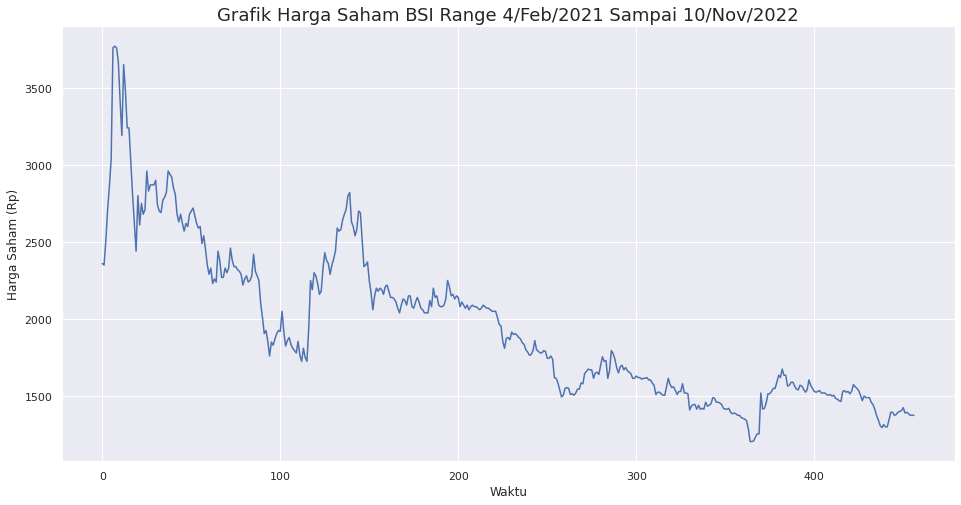

In [37]:
plt.figure(figsize=(16,8))
plt.title('Grafik Harga Saham BSI Range 4/Feb/2021 Sampai 10/Nov/2022', fontsize=18)
plt.plot(df['AdjustedClose'])
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Harga Saham (Rp)', fontsize=12)
plt.show()

In [38]:
data=df.filter(['AdjustedClose'])
data.mean()

AdjustedClose    1944.540481
dtype: float64

In [39]:
df.filter(['AdjustedClose','Date']).sort_values

<bound method DataFrame.sort_values of      AdjustedClose      Date
0           2360.0  20210104
1           2350.0  20210105
2           2510.0  20210106
3           2710.0  20210107
4           2860.0  20210108
..             ...       ...
452         1395.0  20221104
453         1385.0  20221107
454         1375.0  20221108
455         1375.0  20221109
456         1375.0  20221110

[457 rows x 2 columns]>

In [40]:
data = df.filter(['AdjustedClose'])
dataset = data.values
len(dataset)

457

In [41]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

320

In [42]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.4502924 ],
       [0.44639376],
       [0.50877193],
       [0.58674464],
       [0.64522417],
       [0.71539961],
       [0.99610136],
       [1.        ],
       [0.99610136],
       [0.96101365],
       [0.86354776],
       [0.77387914],
       [0.95321637],
       [0.88693957],
       [0.79337232],
       [0.79337232],
       [0.70760234],
       [0.62573099],
       [0.55165692],
       [0.48148148],
       [0.62183236],
       [0.54775828],
       [0.60233918],
       [0.57504873],
       [0.58674464],
       [0.68421053],
       [0.63352827],
       [0.64912281],
       [0.64912281],
       [0.64912281],
       [0.66081871],
       [0.59844055],
       [0.582846  ],
       [0.57894737],
       [0.61013645],
       [0.61793372],
       [0.62962963],
       [0.68421053],
       [0.67641326],
       [0.66861598],
       [0.64132554],
       [0.62573099],
       [0.57504873],
       [0.55555556],
       [0.57504873],
       [0.55165692],
       [0.53216374],
       [0.551

In [43]:
train_data = scaled_data[0:training_data_size,:]
x_train = []
y_train = []
for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i<=51:
        print(x_train)
        print(y_train)

[array([0.4502924 , 0.44639376, 0.50877193, 0.58674464, 0.64522417,
       0.71539961, 0.99610136, 1.        , 0.99610136, 0.96101365,
       0.86354776, 0.77387914, 0.95321637, 0.88693957, 0.79337232,
       0.79337232, 0.70760234, 0.62573099, 0.55165692, 0.48148148,
       0.62183236, 0.54775828, 0.60233918, 0.57504873, 0.58674464,
       0.68421053, 0.63352827, 0.64912281, 0.64912281, 0.64912281,
       0.66081871, 0.59844055, 0.582846  , 0.57894737, 0.61013645,
       0.61793372, 0.62962963, 0.68421053, 0.67641326, 0.66861598,
       0.64132554, 0.62573099, 0.57504873, 0.55555556, 0.57504873,
       0.55165692, 0.53216374, 0.55165692, 0.54385965, 0.57504873])]
[0.5828460038986354]
[array([0.4502924 , 0.44639376, 0.50877193, 0.58674464, 0.64522417,
       0.71539961, 0.99610136, 1.        , 0.99610136, 0.96101365,
       0.86354776, 0.77387914, 0.95321637, 0.88693957, 0.79337232,
       0.79337232, 0.70760234, 0.62573099, 0.55165692, 0.48148148,
       0.62183236, 0.54775828, 0.6023

In [44]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(270, 50, 1)

In [45]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
model.fit(x_train, y_train, batch_size=25, epochs=10)

Epoch 1/10
11/11 [==============================] - 3s 34ms/step - loss: 0.0461
Epoch 2/10
11/11 [==============================] - 0s 36ms/step - loss: 0.0069
Epoch 3/10
11/11 [==============================] - 0s 37ms/step - loss: 0.0045
Epoch 4/10
11/11 [==============================] - 0s 36ms/step - loss: 0.0040
Epoch 5/10
11/11 [==============================] - 0s 34ms/step - loss: 0.0034
Epoch 6/10
11/11 [==============================] - 0s 35ms/step - loss: 0.0029
Epoch 7/10
11/11 [==============================] - 0s 35ms/step - loss: 0.0027
Epoch 8/10
11/11 [==============================] - 0s 35ms/step - loss: 0.0026
Epoch 9/10
11/11 [==============================] - 0s 35ms/step - loss: 0.0025
Epoch 10/10
11/11 [==============================] - 0s 37ms/step - loss: 0.0024


In [48]:
test_data = scaled_data[training_data_size-50:, :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])

In [49]:
x_test = np.array(x_test)

In [50]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [51]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 10ms/step


In [52]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [53]:
predictions

array([[1568.6459],
       [1570.2152],
       [1572.0234],
       [1572.7333],
       [1571.4526],
       [1569.6968],
       [1567.7274],
       [1567.9781],
       [1567.154 ],
       [1565.5577],
       [1563.2644],
       [1555.8871],
       [1546.3447],
       [1536.2793],
       [1526.4419],
       [1515.9889],
       [1506.7566],
       [1497.788 ],
       [1489.6737],
       [1482.3557],
       [1477.9602],
       [1474.7709],
       [1472.7637],
       [1472.1007],
       [1474.1715],
       [1477.8507],
       [1481.319 ],
       [1484.3857],
       [1486.7533],
       [1488.0416],
       [1487.3788],
       [1485.1371],
       [1481.9175],
       [1478.4315],
       [1473.8668],
       [1468.3347],
       [1462.6389],
       [1456.9285],
       [1451.0737],
       [1445.4199],
       [1439.5419],
       [1433.575 ],
       [1427.6282],
       [1421.5569],
       [1413.2754],
       [1400.2854],
       [1384.5886],
       [1368.0682],
       [1352.993 ],
       [1340.6731],


In [54]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

40.30240291400548

In [55]:
#Harga ke-t dan Actual (t+1)
df.filter(['AdjustedClose']).iloc[319:321]

,AdjustedClose
319,1575.0
320,1555.0


<ipython-input-56-f21eb78513c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


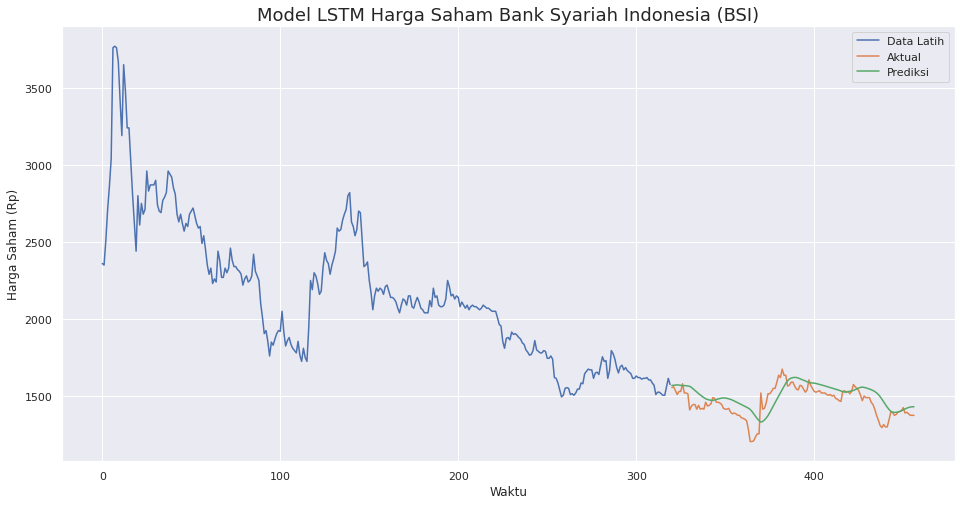

In [56]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model LSTM Harga Saham Bank Syariah Indonesia (BSI)', fontsize=18)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Harga Saham (Rp)', fontsize=12)
plt.plot(train['AdjustedClose'])
plt.plot(valid[['AdjustedClose', 'predictions']])
plt.legend(['Data Latih', 'Aktual', 'Prediksi'], loc='upper right')
plt.show()